<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 14th, 2024

# First hour - Artificial neural networks

## Activation Functions

Activation functions are essential components of deep learning models, introducing necessary non-linearities into neural networks. The selection of an activation function can significantly influence the performance of a model. Numerous activation functions are available, each with specific benefits and drawbacks.

In [ ]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sigmoid

Recall that in our previous session, we discussed the sigmoid activation function. The sigmoid function is widely used as an activation function in neural networks, particularly known for its characteristic S-shaped curve. It maps any real-valued number into the range between 0 and 1, making it **especially useful for models predicting probabilities**.

It is mathematically defined as follows:


$\sigma(x) = \frac{1}{1 + e^{-x}}$


In [ ]:
def sigmoid(x):
    """Compute the sigmoid of x"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Compute the derivative of the sigmoid of x"""
    return sigmoid(x) * (1 - sigmoid(x))

# Example usage
x_values = np.array([-2, -1, 0, 1, 2])
sigmoid_values = sigmoid(x_values)
print("Sigmoid values:", sigmoid_values)

Sigmoid values: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


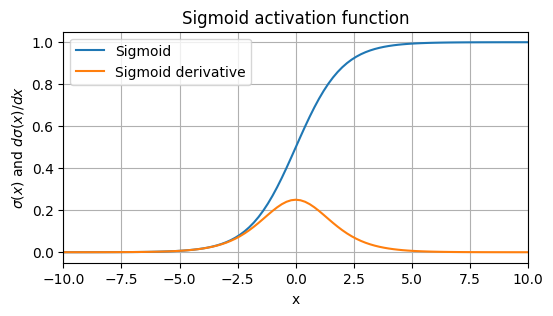

In [ ]:
# Generate a range of values from -10 to 10
x = np.linspace(-10, 10, 101)

# Creating the plot
plt.figure(figsize=(6, 3))
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, sigmoid_derivative(x), label="Sigmoid derivative")
plt.title("Sigmoid activation function")
plt.xlabel("x")
plt.ylabel("$\sigma(x)$ and $d\sigma(x)/dx$")
plt.grid(True)
plt.legend()
plt.xlim(-10, 10);

**Note: Sigmoids are sensitive to the vanishing gradient problem.**

Through the chain rule used for computing derivatives, the gradient between the input and the output of deep learning (multi-layer) networks involves the multiplication of the derivative of the activation function at every layer. For activation functions whose derivatives are systematically smaller than zero, this property means that the gradient converges toward zero relatively fast as the number of layers increases making learning through backpropagation very slow.

In [ ]:
# Maximal gradient after chaining 10 sigmoids
sigmoid_derivative(0)**10  # The derivative is maximal at x=0

9.5367431640625e-07

### Hyperbolic Tangent Function (tanh)

The hyperbolic tangent function, commonly referred to as `tanh`, is another activation function used in neural networks. It is mathematically defined as follows:

$ \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $

Unlike the sigmoid function, `tanh` outputs values between -1 and 1, and **it is zero-centered, i.e., `tanh(0) = 0`. This property helps for the convergence** of neural networks during training. It is particularly effective in hidden layers of a neural network because of this property.


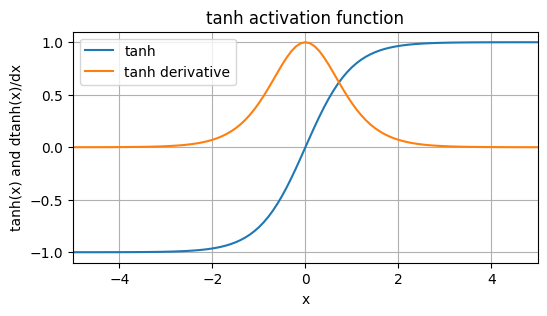

In [ ]:
def tanh(x):
    """Compute the hyperbolic tangent of x"""
    return np.tanh(x)

def tanh_derivative(x):
    """Compute the derivative of the hyperbolic tangent of x"""
    return 1 - tanh(x)**2



x = np.linspace(-5, 5, 101)

# Plotting the tanh function
plt.figure(figsize=(6, 3))
plt.plot(x, tanh(x), label='tanh')
plt.plot(x, tanh_derivative(x), label='tanh derivative')
plt.title('tanh activation function')
plt.xlabel('x')
plt.ylabel('tanh(x) and dtanh(x)/dx')
plt.grid(True)
plt.xlim(-5, 5)
plt.legend();

### Rectified Linear Unit (ReLU) Function

The Rectified Linear Unit (ReLU) function is a popular activation function used in deep learning models. It is mathematically defined as follows:

$ \text{ReLU}(x) = \max(0, x) $

The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero. This activation function is very **computationally efficient** and can help obtain **sparser representations** (i.e., many outputs get zeroed). Further, its derivative equal to 1 for input values larger than 0 **helps address the vanishing gradient problem** often encountered with other activation functions like sigmoid and tanh. ReLU is particularly effective in hidden layers of a neural network because of its simplicity and efficiency.


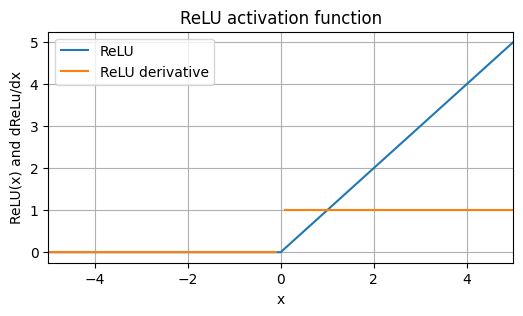

In [ ]:
def relu(x):
    """Compute the Rectified Linear Unit of x"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Compute the derivative of the sigmoid of x"""
    y = x.copy()
    y[x < 0] = 0
    y[x > 0] = 1
    y[x == 0] = np.nan # The derivative is undefined at x=0
    return y


x = np.linspace(-5, 5, 101)

# Plotting the ReLU function
plt.figure(figsize=(6, 3))
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, relu_derivative(x), label='ReLU derivative')
plt.title('ReLU activation function')
plt.xlabel('x')
plt.ylabel('ReLU(x) and dReLu/dx')
plt.grid(True)
plt.legend()
plt.xlim(-5, 5);

### Leaky Rectified Linear Unit (Leaky ReLU) Function

The Leaky Rectified Linear Unit (Leaky ReLU) function is an activation function used in neural networks, **designed to address the "dying ReLU" problem**. This problem happens when large negative weights cause a ReLU unit to output zeros for every possible input value. Since the gradient in that region of the ReLU function is zero, these weights will never change, and this unit will never go out of this state of unresponsiveness. It is "dead".

The Leaky ReLU is mathematically defined as follows:

$ \text{Leaky ReLU}(x) = \begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases} $

where $\alpha$ is a small constant (usually 0.01) that allows a small gradient when the input is negative. This ensures that neurons with negative inputs do not stop learning completely, which can happen with the standard ReLU function. Leaky ReLU is particularly effective in hidden layers of a neural network for maintaining gradient flow through the network.


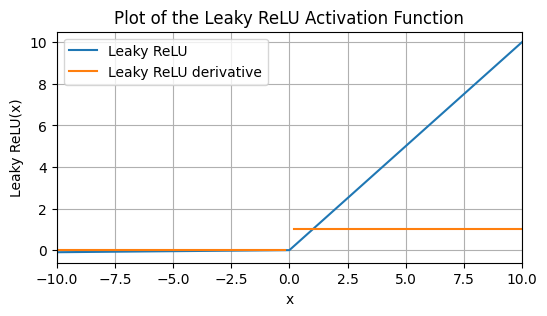

In [ ]:
def leaky_relu(x, alpha=0.01):
    """Compute the Leaky Rectified Linear Unit of x"""
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    """Compute the derivative of the sigmoid of x"""
    y = x.copy()
    y[x < 0] = alpha
    y[x > 0] = 1
    y[x == 0] = np.nan # The derivative is undefined at x=0
    return y

x = np.linspace(-10, 10, 101)

# Plotting the Leaky ReLU function
plt.figure(figsize=(6, 3))
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, leaky_relu_derivative(x), label='Leaky ReLU derivative')
plt.title('Plot of the Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid(True)
plt.legend()
plt.xlim(-10, 10);

## Exercises :

Create an array of input values from -10 to 10. Calculate the output for each activation function. Plot the outputs of all activation functions in subplots.

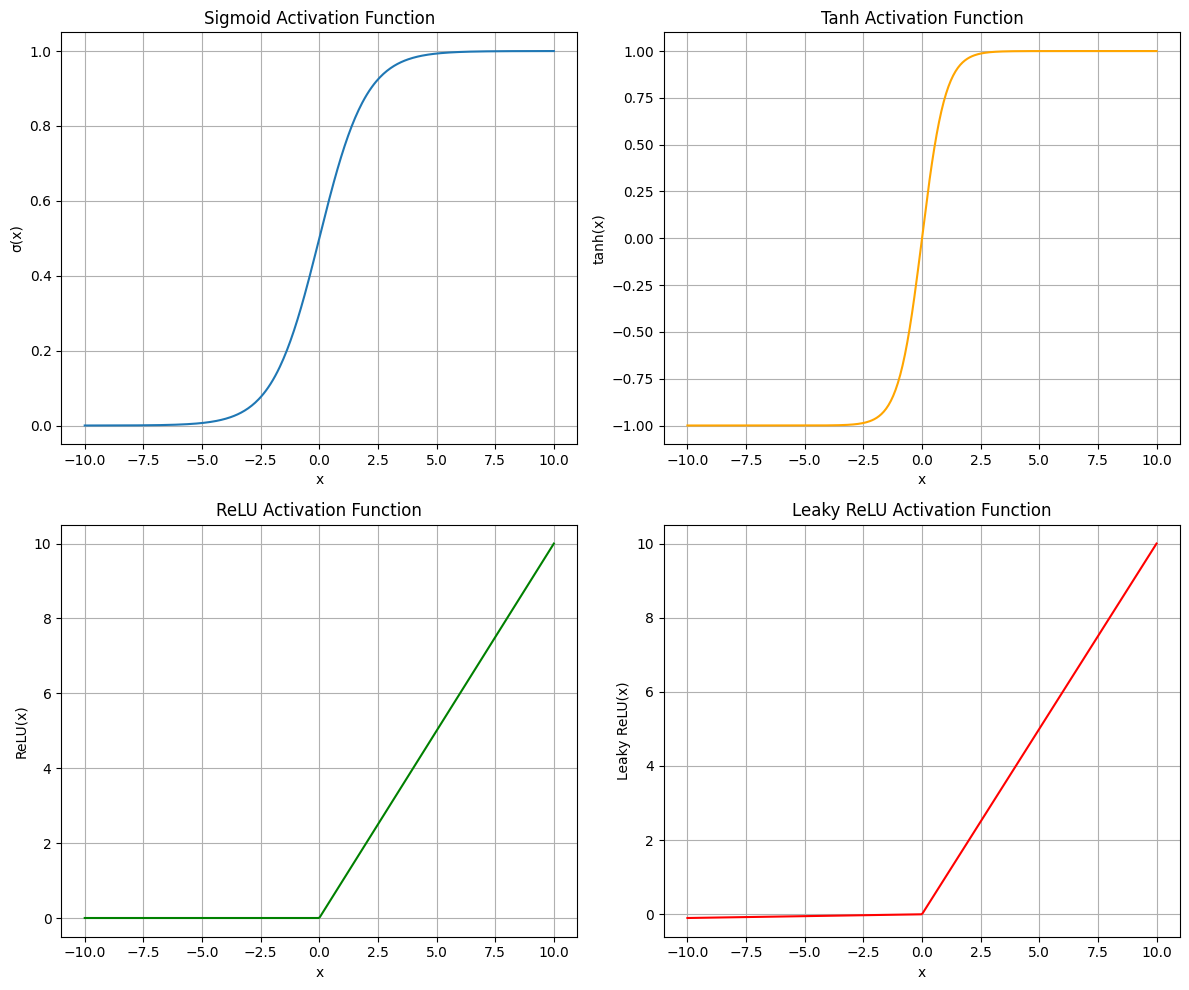

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

# Create an array of input values
x = np.linspace(-10, 10, 400)

# Calculate the output for each activation function
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

axes[0].plot(x, y_sigmoid, label='Sigmoid')
axes[0].set_title('Sigmoid Activation Function')
axes[0].set_xlabel('x')
axes[0].set_ylabel('σ(x)')
axes[0].grid(True)

axes[1].plot(x, y_tanh, label='Tanh', color='orange')
axes[1].set_title('Tanh Activation Function')
axes[1].set_xlabel('x')
axes[1].set_ylabel('tanh(x)')
axes[1].grid(True)

axes[2].plot(x, y_relu, label='ReLU', color='green')
axes[2].set_title('ReLU Activation Function')
axes[2].set_xlabel('x')
axes[2].set_ylabel('ReLU(x)')
axes[2].grid(True)

axes[3].plot(x, y_leaky_relu, label='Leaky ReLU', color='red')
axes[3].set_title('Leaky ReLU Activation Function')
axes[3].set_xlabel('x')
axes[3].set_ylabel('Leaky ReLU(x)')
axes[3].grid(True)

plt.tight_layout()
plt.show()


# Second hour - Artificial neural networks

### Exploring Gradient Descent

This session is designed to enhance your understanding of gradient descent, a key optimization algorithm in machine learning. By the end of this lecture, you should have a practical, visual comprehension of how gradient descent navigates the path to minimal error in parameter space.

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Configuration Details
- **Learning rate (`learning_rate`)**: Sets the step size at each iteration while moving toward a minimum.
- **Real parameters (`real_params`)**: The actual parameters of our target function.
- **Initial parameters (`init_params`)**: Starting values for parameters from which gradient descent will begin.

In [ ]:
# Cell for setting configurations
learning_rate = 0.04
real_params = [1.2, 2.5]  # parameters of the real function
init_params = [0.5, 4.0]  # initial guess for parameters

#### Simulation Setup
In this example, we have some process `f(x)` that produces data given an input value `x`. We also have the following model for this process $y=sin( b\cdot cos(a \cdot x))$. This model depends on the value of parameters `a` and `b`. We can measure some noisy observations from this process, and we want to estimate the optimal parameters `a` and `b` for the generation of these observations. We can measure how well our model and our parameter values track the real process using the mean square error (MSE).

Here, we first define a model (`y_fun`) and simulate some noisy observations that this model would produce with the target (real) parameter values.

In [ ]:
# Define our model, or target function using TensorFlow operations
def y_fun(a, b, x):
    return tf.sin(b * tf.cos(a * x))

# Simulate noisy observation from which we want to
# infer the model parameter values
x = np.linspace(-1, 1, 200, dtype=np.float32)
true_y = y_fun(real_params[0], real_params[1], x)
noise = tf.random.normal(true_y.shape, stddev=0.1)
y = true_y + noise

We now set up the TensorFlow graph with variables for parameters, a prediction operation, a loss function, and a training operation using gradient descent.

In [ ]:
# Create TensorFlow variables for parameters
a = tf.Variable(init_params[0], dtype=tf.float32)
b = tf.Variable(init_params[1], dtype=tf.float32)

# Optimizer; SGD: Stochastic Gradient Descent
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Arrays to store parameter values and cost for plotting or further analysis
a_list, b_list, cost_list = [], [], []

nb_iterations = 1000
# Implementing the training loop
for t in range(nb_iterations):

    with tf.GradientTape() as tape:
        # The GradientTape class record operations
        # being performed to allow automatic differentiation
        # (i.e., gradient automated computation)

        pred = y_fun(a, b, x)  # Compute predictions from our model
        mse = tf.reduce_mean(tf.square(y - pred))  # Compute the loss

    # Store the values of parameters and MSE
    a_list.append(a.numpy())
    b_list.append(b.numpy())
    cost_list.append(mse.numpy())

    # Calculate gradients between the target (the loss function)
    # and the sources (the parameters to be optimized)
    gradients = tape.gradient(target=mse, sources=[a, b])
    da_dx, db_dx = gradients

    # Use the optimizer and calculated gradients to update the parameter values
    # in the best direction to minimize the loss function
    optimizer.apply_gradients([(da_dx, a),
                               (db_dx, b)])

    # Optionally print the loss
    if t % 100 == 0:
        print(f"Step {t}, MSE: {mse.numpy()}")

Step 0, MSE: 2.1229639053344727
Step 100, MSE: 0.010829830542206764
Step 200, MSE: 0.008846773765981197
Step 300, MSE: 0.008689172565937042
Step 400, MSE: 0.008668123744428158
Step 500, MSE: 0.008664781227707863
Step 600, MSE: 0.008664213120937347
Step 700, MSE: 0.008664116263389587
Step 800, MSE: 0.008664097636938095
Step 900, MSE: 0.008664093911647797


#### Looking at the results

Text(0.5, 1.0, 'Cost Function Over Iterations')

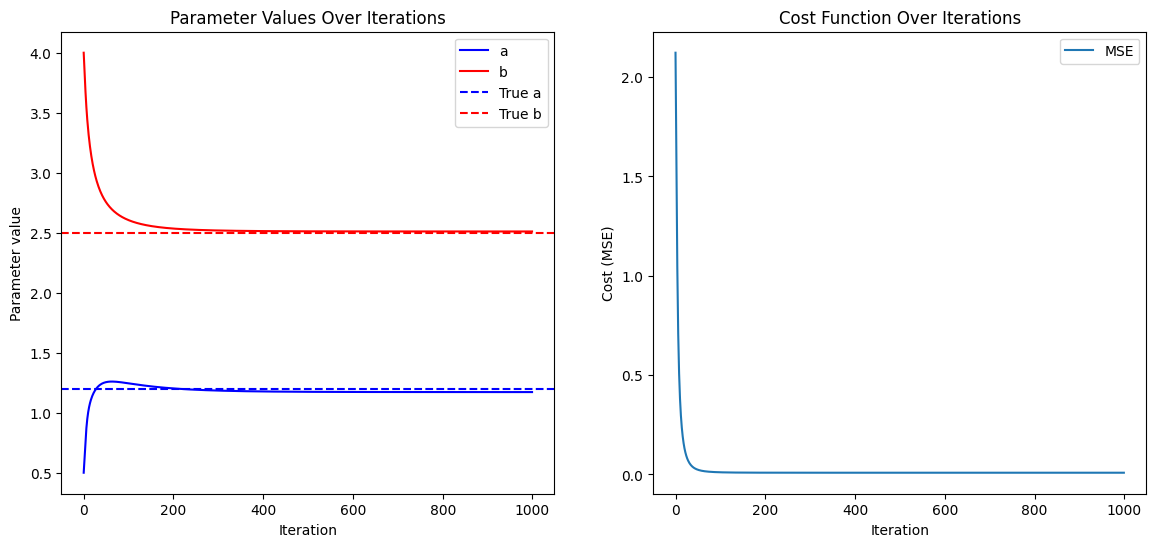

In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))

# Plot parameter values over iterations
plt.subplot(1, 2, 1)
plt.plot(a_list, label='a', color="blue")
plt.plot(b_list, label='b', color="red")
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.axhline(y=real_params[0], label="True a", color="blue", linestyle="dashed")
plt.axhline(y=real_params[1], label="True b", color="red", linestyle="dashed")
plt.legend()
plt.title('Parameter Values Over Iterations')

# Plot the cost function over iterations
plt.subplot(1, 2, 2)
plt.plot(cost_list, label='MSE')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.title('Cost Function Over Iterations')

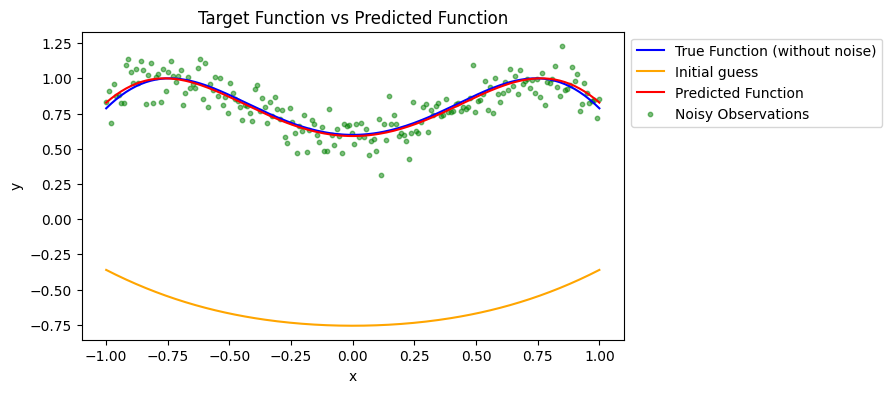

In [ ]:
# Compute predicted function values using final parameters
predicted_y = y_fun(a.numpy(), b.numpy(), x)

initial_guess_y = y_fun(init_params[0], init_params[1], x)

# Plot the target function and predictions
plt.figure(figsize=(7, 4))
plt.plot(x, true_y, label='True Function (without noise)', color='blue')
plt.plot(x, initial_guess_y, label='Initial guess', color='orange')
plt.plot(x, predicted_y, label='Predicted Function', color='red')
plt.scatter(x, y, label='Noisy Observations', color='green', alpha=0.5, s=10)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target Function vs Predicted Function');

In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp
# Generate the 3D cost surface
a3D, b3D = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
cost3D = np.array([np.mean(np.square(y_fun(a_, b_, x) - y))
                   for a_, b_ in zip(a3D.flatten(), b3D.flatten())])
cost3D = cost3D.reshape(a3D.shape)


# Plotly visualization
fig = sp.make_subplots(rows=1, cols=1, specs=[[{'type': 'surface'}]],
                       subplot_titles=['MSE (loss)'])

surface = go.Surface(z=cost3D, x=a3D, y=b3D,
                     colorscale='Viridis', showscale=False)

start_point = go.Scatter3d(x=[a_list[0]], y=[b_list[0]], z=[cost_list[0]],
                           mode='markers', marker=dict(size=5, color='red'),
                           name='Start')

path = go.Scatter3d(x=a_list, y=b_list, z=cost_list, mode='lines+markers',
                    line=dict(color='red', width=2),
                    marker=dict(size=3, color='red'), name='Gradient Path')

fig.add_trace(surface, row=1, col=1)
fig.add_trace(start_point, row=1, col=1)
fig.add_trace(path, row=1, col=1)
fig.update_scenes(camera_eye=dict(x=0.55, y=-0.75, z=0.75), row=1, col=1)
fig.update_scenes(aspectratio=dict(x=1, y=1, z=0.5), row=1, col=1)
fig.update_scenes(annotations=[], row=1, col=1)

fig.update_layout(height=600, width=800,
                  xaxis=go.XAxis(title='a'),
                  yaxis=go.YAxis(title='b'),
                  title_text='3D Cost Surface Visualization')

fig.show()

## Exercise: Exploring Gradient Descent on a Simple Function

#### Objective
This exercise aims to deepen your understanding of the gradient descent algorithm through practical application. By simulating gradient descent on a simple quadratic function, you will visualize how the algorithm optimizes and approaches the minimum.

#### Task Description
1. **Define the Function and Its Derivative**:
   - Implement a function `f(x) = (x - 3)^2`, which has its minimum at `x = 3`.
   - Define the derivative of this function, `f'(x) = 2(x - 3)`.

2. **Implement Gradient Descent**:
   - Start with an initial guess at `x_0 = -4`.
   - Use a learning rate `α = 0.1`.
   - Perform 25 iterations of gradient descent, updating the guess in each iteration based on the gradient of the function at the current point.

3. **Visualize the Results**:
   - Plot the function `f(x)` over a reasonable range, such as from -6 to 6.
   - Overlay the trajectory of the points visited by the gradient descent algorithm on this plot.


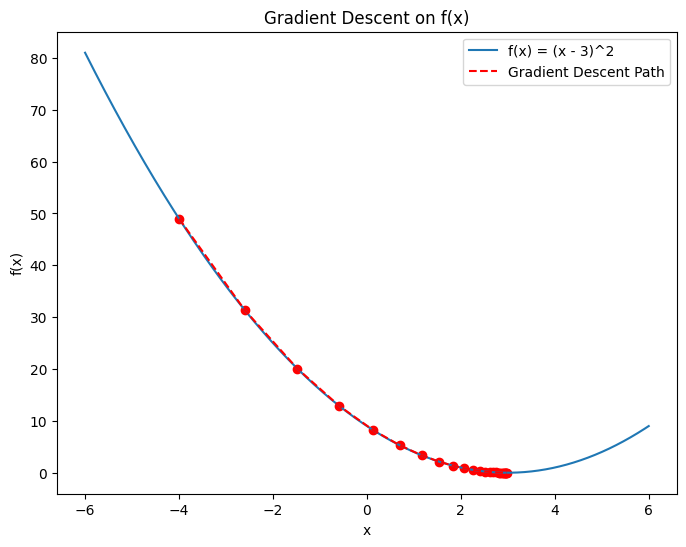

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return (x - 3)**2

def df(x):
    return 2 * (x - 3)

# Gradient descent settings
x_start = -4
alpha = 0.1
iterations = 25
x_values = [x_start]

# Perform gradient descent
for i in range(iterations):
    current_x = x_values[-1]
    new_x = current_x - alpha * df(current_x)
    x_values.append(new_x)

# Generate x values for plotting the function
x_plot = np.linspace(-6, 6, 400)
y_plot = f(x_plot)

# Plotting the function
plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label='f(x) = (x - 3)^2')

# Plotting the points of gradient descent
y_values = [f(x) for x in x_values]
plt.scatter(x_values, y_values, color='red')
plt.plot(x_values, y_values, 'r--', label='Gradient Descent Path')

plt.title('Gradient Descent on f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()